# 재표본추출(resampling)
- 랜덤한 변동성을 알아보자는 일반적인 목표를 가지고, 관찰된 데이터의 값에서 표본을 반복적으로 추출
- 부트스트랩: 추정의 신뢰성을 평가하는데 사용
- 순열검정: 두 개 이상의 그룹과 관련된 가설을 검증

## 순열검정(permutation test)
- 두개 이상의 표본이 관여되며, A/B 또는 기타 가설검정을 위해 사용되는 그룹
- permute는 순서를 변경 한다는 의미
<br><br><순열검정 절차>
1. 여러그룹의 결과를 단일 데이터 집합으로 결합
2. 결합된 데이터를 작 섞은 후, 그룹 A와 동일한 크기의 표본을 무작위로(비복원) 추출
3. 나머지 데이터에서 그룹 B와 동일한 크기의 샘플을 무작위로(비복원) 추출
4. C, D 등의 그룹에 대해서도 동일한 작업을 수행
5. 원래 샘플에 대해 구한 통계량 또는 추정치가 무엇이었든간에 지금 추출한 재표본에 대해 모두 다시 계산하고 기록(이것이 한번의 순열 과정)
6. 앞선 단계들을 R번 반복하여 검정통계량 순열분포를 얻는다.<br>
=> 관찰된 차이가 순열분포 바깥에 있다면, 통계적으로 유의미하다(statistically significant)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import numpy as np

### Page A와 Page B의 세션 시간 순열 검정

In [2]:
session_times = pd.read_csv('../../data/web_page_data.csv')
session_times['Time'] = session_times['Time']*100

In [3]:
session_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


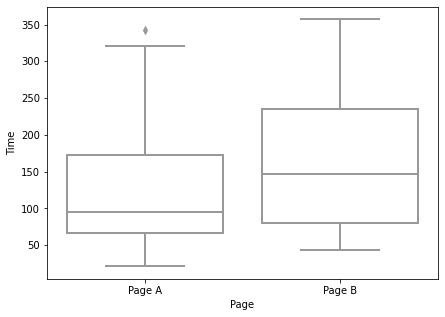

In [4]:
# Page A, B 의 세션시간 비교
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(data=session_times, x='Page', y='Time', color='white', linewidth=2, ax=ax)
plt.show()

In [5]:
# 두 그룹의 평균 비교
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(f"두 그룹의 평균 차이: {np.round(mean_b - mean_a, 2)}")

두 그룹의 평균 차이: 35.67


In [6]:
# 한번의 순열 과정 함수
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB)) # 비복원 추출
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

# 함수 테스트
nA = len(session_times[session_times.Page == 'Page A'])
nB = len(session_times[session_times.Page == 'Page B'])
perm_fun(session_times.Time, nA, nB)

-17.81904761904761

In [7]:
# 순열을 1000번 수행
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

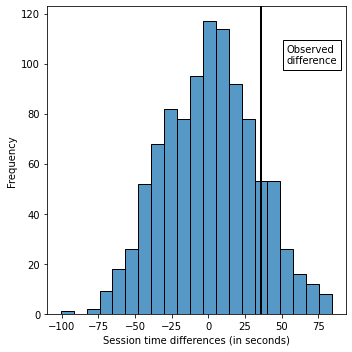

In [8]:
# 실제 관찰된 차이가 순열분포 범위 내에 있다 => 두 집단의 차이는 통계적으로 유의하지 않다.
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data=perm_diffs, ax=ax)
ax.axvline(x=mean_b-mean_a, color='black', linewidth=2)
ax.text((mean_b-mean_a)*1.5, 100, s='Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
# 순열로 구한 평균이 실제 관찰된 세션 시간의 차이를 넘어서는 경우의 퍼센트
str(np.mean(perm_diffs > (mean_b - mean_a))*100) + '%'

'14.299999999999999%'

### 가격A와 가격B의 전환율 순열 검정

In [10]:
t_A = 23739 # 가격 A를 사용한 전체 사람수
c_A = 200 # 가격 A를 사용한 사람중 전환한 사람의수
t_B = 22588
c_B = 182

# 두 가격의 전환률 차이
obs_pct_diff = 100*(c_A/t_A - c_B/t_B)
f"{obs_pct_diff:.4f}%"

'0.0368%'

In [11]:
conversion = [0]*(t_A+t_B-c_A-c_B)
conversion = conversion + [1]*(c_A+c_B)
conversion = pd.Series(conversion)

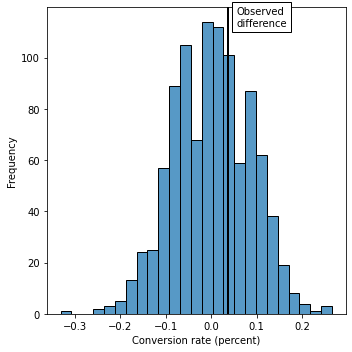

In [12]:
# 관측된 차이는 랜덤 순열분포 범위내에 있다. => 두 집단의 차이는 통계적으로 유의하지 않다.
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB)) # 비복원 추출
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

perm_diffs = [100*perm_fun(conversion, t_A, t_B) for _ in range(1000)]
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data=perm_diffs, ax=ax)
ax.axvline(x=obs_pct_diff, color='black', linewidth=2)
ax.text((obs_pct_diff)*1.5, 120, s='Observed\ndifference', va='top', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()